In [117]:
# PYTHON LIBRARIES
%matplotlib inline

import pandas as pd
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from adjustText import adjust_text
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

## function to plot a pandas dataframe

In [118]:
def plot(df_raw):
    # PLOT SETUP
    scale = 6;
    fig   = plt.figure(figsize=(3*scale, 2*scale));
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15)
    plt.tight_layout();

    for i in range(0,len(df_raw.columns),3):
        # Define x axis as the date axis
        x_str = df_raw.columns[i]; x_units = r'$[\frac{rad}{s}]$';
        y1_str = df_raw.columns[i+1]; y_units = r'$[Pa \cdot s]$';
        y2_str = df_raw.columns[i+2]; y_units = r'$[Pa \cdot s]$';

        # Remove NANs from interesting x,y data
        df_fil = pd.DataFrame(df_ram_raw);
        df_fil = df_fil.dropna(subset=[x_str, y1_str]);
        df_fil = df_fil.dropna(subset=[x_str, y2_str]);

        # Stablish the plot area
        ax0 = plt.gca()

        # Extract data from a specific country
        x = df_fil.iloc[:][x_str];
        y1 = df_fil.iloc[:][y1_str];
        y2 = df_fil.iloc[:][y2_str];

        # Plot a curve to join the data points
        #plt.plot(x, y) #, label="B")
        plt.scatter(x, y1, s=45, marker='o', label=r'$G^\prime(\omega)$' + ' ' + df_raw.columns[i+1].split('_')[1])
        plt.scatter(x, y2, s=45, marker='v', label=r'$G^{\prime\prime}(\omega)$' + ' ' + df_raw.columns[i+2].split('_')[1])
        plt.plot(x, y1, linewidth=2, linestyle='-')
        plt.plot(x, y2, linewidth=2, linestyle='-.')

        # # avoid overlaps between annotations and add a linking line
        # kwargs = dict(transform=ax0.transAxes);
        # adjust_text(texts_ax0, ax=ax0, arrowprops=dict(arrowstyle="-", color='k', lw=0.1), **kwargs);

        ### ### ### ### ###
        ### ### ### ### ###

    # Show the plot lengend to link colors and polymer names
    handles, labels = ax0.get_legend_handles_labels();
    lgd = dict(zip(labels, handles));

    # fig.autofmt_xdate();
    ax0.set_xlabel(r'$\omega$' + '    ' + x_units, fontsize=24);
    ax0.set_ylabel(r'$G^\prime(\omega)$'  + ' and ' +  r'$G^{\prime\prime}(\omega)$' + '    ' + y_units, fontsize=24);

    for tick in ax0.xaxis.get_major_ticks():
        tick.label.set_fontsize(18)
    for tick in ax0.yaxis.get_major_ticks():
        tick.label.set_fontsize(18) 

    ax0.tick_params(which='both',
                    direction='in',
                    length=5,
                    width=2,
                    bottom=True,
                    top=True,
                    left=True,
                    right=True)

    # Display main plot
    plt.yscale('log');
    plt.xscale('log');
    plt.legend(lgd.values(), lgd.keys(), prop={'size': 18}, loc="best");
    plt.savefig('_Fig4a' + '.png', dpi=200, bbox_inches='tight');
    plt.show();
    mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults

---
# ./TTSDataAHDPEResins5temperatures.xls
---

## WLF
$$ log a_T = \frac{- c_1 \left( T - T_0 \right)}{c_2 + \left( T - T_0 \right)} $$

where: <br>
$c_1$ and $c_2$ are empirical constants <br>
$T$ is the temperature of interest <br>
$T_0$ is the reference temperature <br>
$a_T$ is the amount by which the time has to be shifted to get the same result at $T$ as in $T_0$

In [126]:
def _a_T(T, T_0, c_1, c_2):
    if T != T_0:
        nume = - c_1 * (T - T_0);
        deno = c_2 + (T - T_0);
        a_T  = nume / deno;
    else:
        a_T = 0;
    return a_T;

## read .csv with the provided frquency, $G^\prime$, and $G^{\prime\prime}$ data

In [127]:
df_raw = pd.read_csv("./data.csv", delimiter=",");
print("./data.csv"); display(df_raw.head(2));

./data.csv


,frecuencia_Sh170oC,G1_Sh170oC,G2_Sh170oC,frecuencia_Sh190oC,G1_Sh190oC,G2_Sh190oC,frecuencia_Sh210oC_ref,G1_Sh210oC_ref,G2_Sh210oC_ref,frecuencia_Sh230oC,G1_Sh230oC,G2_Sh230oC,frecuencia_Sh250oC,G1_Sh250oC,G2_Sh250oC
0,500.0,343000.0,175000.0,500.0,298000.0,163000.0,500.000,288545.0,169359.0,500.000,251301.0,150515.0,500.000,218582.0,137616.0
1,281.0,279000.0,155000.0,281.0,241000.0,142000.0,281.172,231412.0,146049.0,281.172,199744.0,128738.0,315.477,179203.0,120310.0


## plot originals

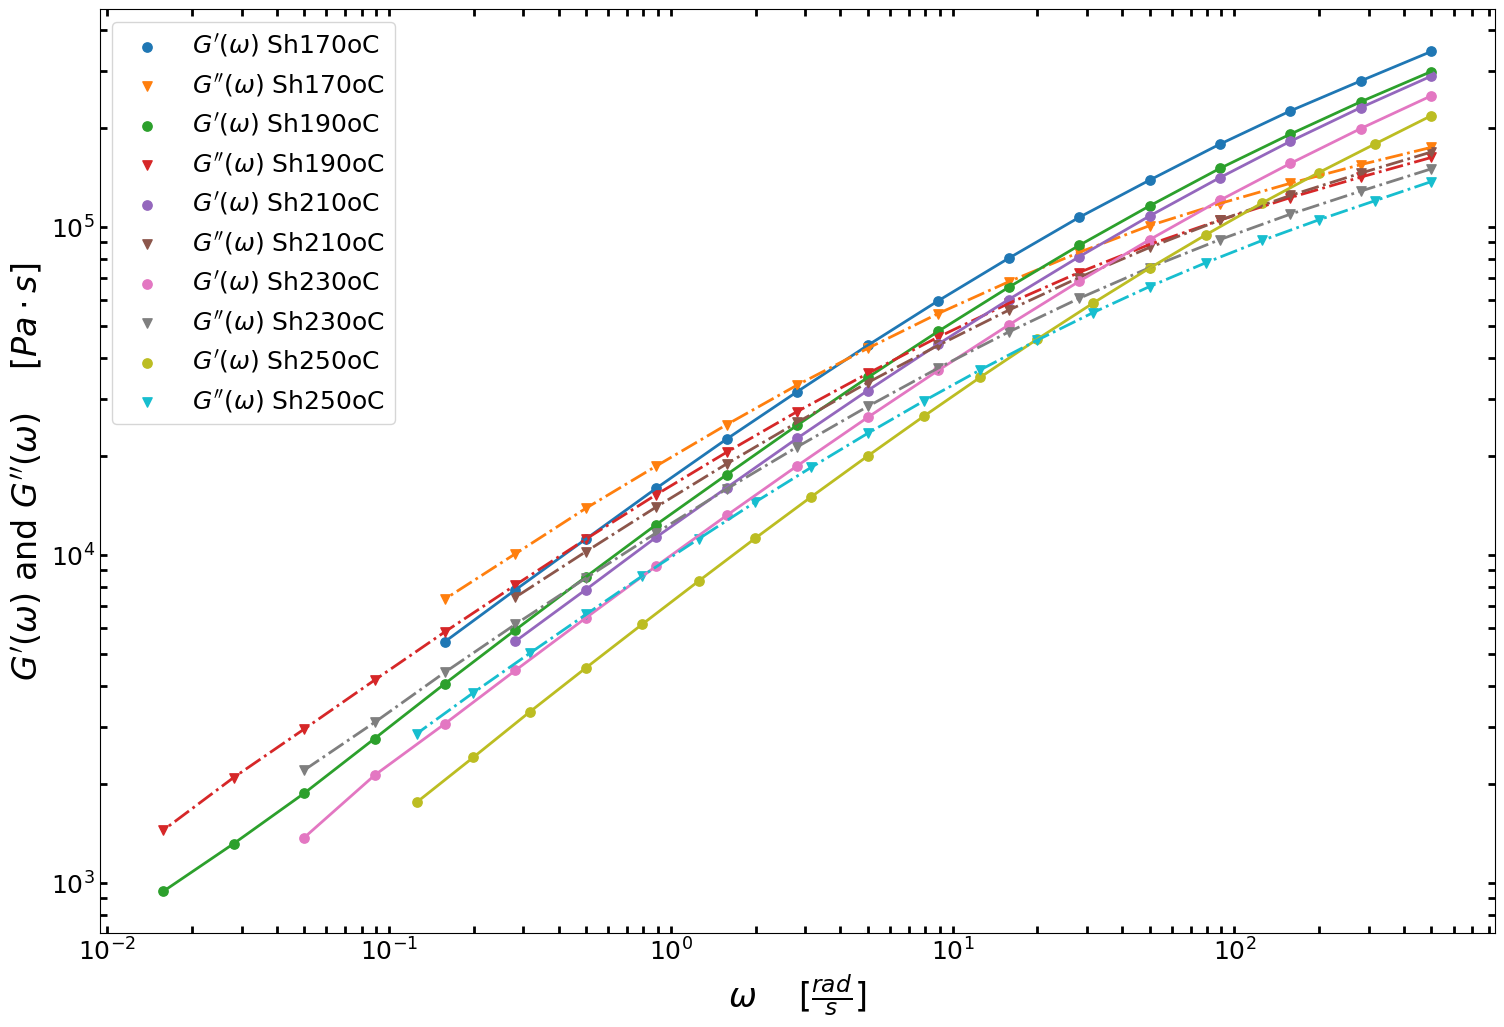

In [128]:
plot(df_raw)

## calculate WLF for each temperature

In [134]:
T   = [170, 190, 210, 230, 250];
T_0 = 210;
c_1 = [1, 1, 1, 1, 1];
c_2 = [1000000, 1, 1, 1, 1];

df_shifted = df_raw.copy();

T_cnt = 0;
for (columnName, columnData) in df_shifted.iteritems():
    #df_shifted.columns[i] = df_shifted.columns[i] + 1
    if "fre" in columnName:
        df_shifted[columnName] = df_shifted[columnName] + _a_T(T[T_cnt], T_0, c_1[T_cnt], c_2[T_cnt])
        print(T_cnt, T[T_cnt], T_0, c_1[T_cnt], c_2[T_cnt], _a_T(T[T_cnt], T_0, c_1[T_cnt], c_2[T_cnt]), columnName)
        T_cnt = T_cnt + 1;
    
print("df_shifted"); display(df_shifted.head(2));

0 170 210 1 1000000 4.000160006400256e-05 frecuencia_Sh170oC
1 190 210 1 1 -1.0526315789473684 frecuencia_Sh190oC
2 210 210 1 1 0 frecuencia_Sh210oC_ref
3 230 210 1 1 -0.9523809523809523 frecuencia_Sh230oC
4 250 210 1 1 -0.975609756097561 frecuencia_Sh250oC
df_shifted


,frecuencia_Sh170oC,G1_Sh170oC,G2_Sh170oC,frecuencia_Sh190oC,G1_Sh190oC,G2_Sh190oC,frecuencia_Sh210oC_ref,G1_Sh210oC_ref,G2_Sh210oC_ref,frecuencia_Sh230oC,G1_Sh230oC,G2_Sh230oC,frecuencia_Sh250oC,G1_Sh250oC,G2_Sh250oC
0,500.00004,343000.0,175000.0,498.947368,298000.0,163000.0,500.000,288545.0,169359.0,499.047619,251301.0,150515.0,499.02439,218582.0,137616.0
1,281.00004,279000.0,155000.0,279.947368,241000.0,142000.0,281.172,231412.0,146049.0,280.219619,199744.0,128738.0,314.50139,179203.0,120310.0


## plot shifted data (master curve)

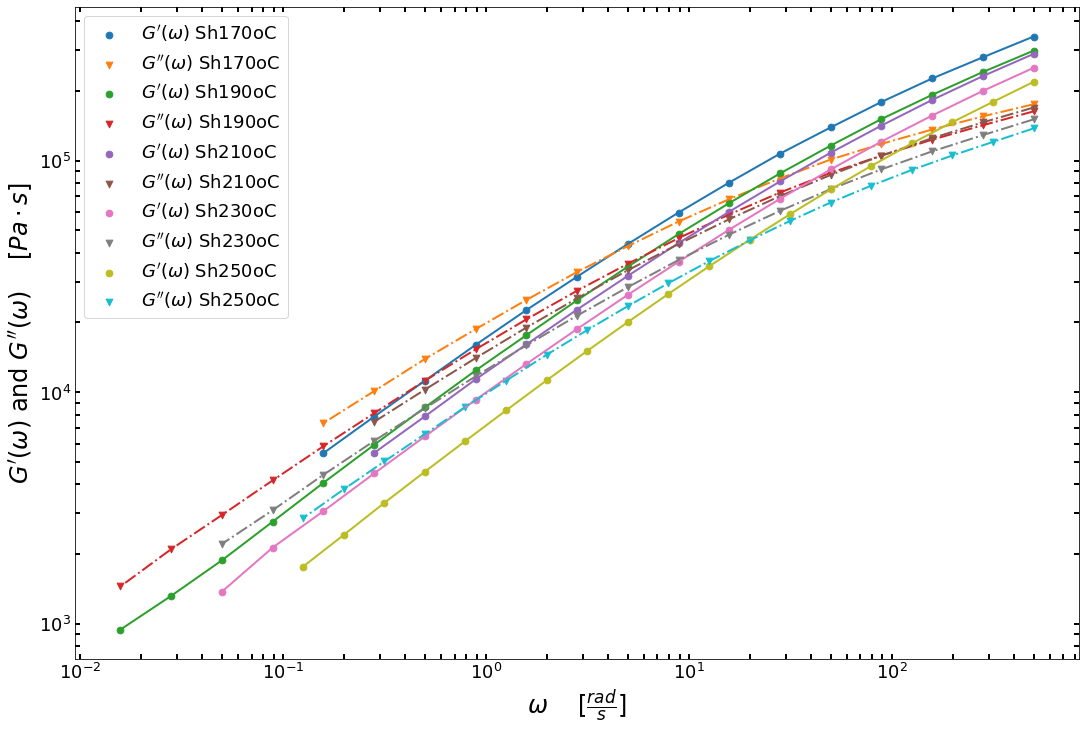

In [123]:
plot(df_shifted)